(lecture15:the-generalized-linear-model)=
# The generalized linear model

Let me now show you the most general form of a linear model.
It is called the *generalize linear model*.

The form of the generalized linear model is:

$$
y(\mathbf{x};\mathbf{w}) = \sum_{j=1}^{m} w_{j}\phi_{j}(\mathbf{x}) = \mathbf{w^{T}\boldsymbol{\phi}(\mathbf{x})}
$$

where the weight vector is:

$$
\mathbf{w} = (w_{1}, ... , w_{m})^{T}
$$ 

and 

$$
\boldsymbol{\phi} = (\phi_{1}, ..., \phi_{m})^{T}
$$ 

are arbitrary *basis functions*.
Note that the model is linear in $\mathbf{w}$ not in $\mathbf{x}$, but the basis functions $\boldsymbol{\phi}(\mathbf{x})$ can be non-linear.

## The polynomial model as a generalized linear model
We have already seen an example of a generalized linear model when $\mathbf{x}$ has only one dimension: the polynomial model.
In the polynomial model, the basis functions are:

$$
\phi_1(x) = 1,
$$

$$
\phi_2(x) = x,
$$

$$
\phi_3(x) = x^2,
$$

and so on.

## Multivariate linear regression as a generalized linear model
In multivariate linear regression the inputs $\mathbf{x}$ have $d$ dimensions, say 

$$
\mathbf{x}=(x_1,\dots,x_d).
$$

The linear model is:

$$
y = w_0 + w_1x_1 + w_2x_2 + \dots w_dx_d.
$$

This is also a generalized linear model with $m=d+1$ basis functions:

$$
\phi_1(\mathbf{x}) = 1,
$$

$$
\phi_2(\mathbf{x}) = x_1,
$$

$$
\phi_3(\mathbf{x}) = x_2,
$$

and so on.

## Other generalized linear models
Some common examples of generalized linear moedls include:
+ Multi-dimensional polynomials, 

$$
\phi_j(\mathbf{x}) = \sum_{\alpha\in\mathcal{A}_j}\beta_{\alpha}\mathbf{x}^{\alpha},
$$

where we are using the [multi-index notation](https://en.wikipedia.org/wiki/Multi-index_notation) to save some space.

+ Radial basis functions,

$$
\phi_j(\mathbf{x}) = \exp\left\{-\frac{\parallel \mathbf{x} - \mathbf{x}_j\parallel^2}{2\ell^2}\right\}.
$$

+ Fourier series, 
$$
\phi_{2j}(x) = \cos\left(\frac{2j\pi}{L}x\right)$ and $\phi_{2j+1}(x)=\sin\left(\frac{2j\pi}{L}x\right).
$$

We will play with that last two in this section.

## Fitting the generalized linear model using least squares

The idea is to find the best $\mathbf{w}$ by minimizing a quadratic loss function:

$$
\mathcal{L}(\mathbf{w}) = \sum_{i=1}^N\left[y(\mathbf{x}_i;\mathbf{w}) - y_i\right]^2.
$$

As we discussed in the previous sections, the loss function can be re-expressed as:

$$
\begin{array}{ccc}
\mathcal{L}(\mathbf{w}) &=& \lVert\boldsymbol{\Phi}\mathbf{w} - \mathbf{y}\rVert^2\\
&=& \left(\boldsymbol{\Phi}\mathbf{w} - \mathbf{y}\right)^T\left(\boldsymbol{\Phi}\mathbf{w} - \mathbf{y}\right).
\end{array}
$$

Here $\boldsymbol{\Phi}\in\mathbb{R}^{n\times m}$ is the design matrix:

$$
\Phi_{ij} = \phi_j(\mathbf{x}_j).
$$

So the design matrix is $N\times M$ where $N$ is the number of observations and $M$ is the number of basis functions.
Furthemore, the $i$-th column of the design matrix is the $i$-th basis function evaluated at all $N$ observed inputs.

To minimize the loss function, we follow these steps:
+ Take the derivative of $\mathcal{L}(\mathbf{w})$ with respect to $\mathbf{w}$.
+ Set it equal to zero and solve for $\mathbf{w}$.
+ You will get [(Bishop, 2006)](http://www.amazon.com/Pattern-Recognition-Learning-Information-Statistics/dp/0387310738) the following linear system:

$$
\left(\mathbf{\Phi}^{T}\mathbf{\Phi}\right)\mathbf{w} = \mathbf{\Phi}^{T}\mathbf{y}.
$$

This is mathematically identical to what we had for the linear and polynomial regression!
The only difference is that we now call the design matrix $\boldsymbol{\Phi}$ instead of $\mathbf{X}$.

To solve this problem, just use:

> [numpy.linalg.lstsq](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.lstsq.html)

You give it $\mathbf{\Phi}$ and $\mathbf{y}$ and it returns the $\mathbf{w}$ that solves the linear system.

## Example - Motorcycle data with polynomials

Let's load the the motorcycle data to demonstrate generalized linear models.
Just like before, you need to make sure that the data file is in the current working directory of this Jupyter notebook.
The data file is [here](https://raw.githubusercontent.com/PredictiveScienceLab/data-analytics-se/master/activities/motor.dat).

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')
import numpy as np
import scipy.stats as st
import pandas as pd
import requests
import os
def download(url, local_filename=None):
    """
    Downloads the file in the ``url`` and saves it in the current working directory.
    """
    data = requests.get(url)
    if local_filename is None:
        local_filename = os.path.basename(url)
    with open(local_filename, 'wb') as fd:
        fd.write(data.content)

In [3]:
url = 'https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-297-intro-to-data-science/master/data/motor.dat'
download(url)

We should now have the file. Let's load it and visualize the data:

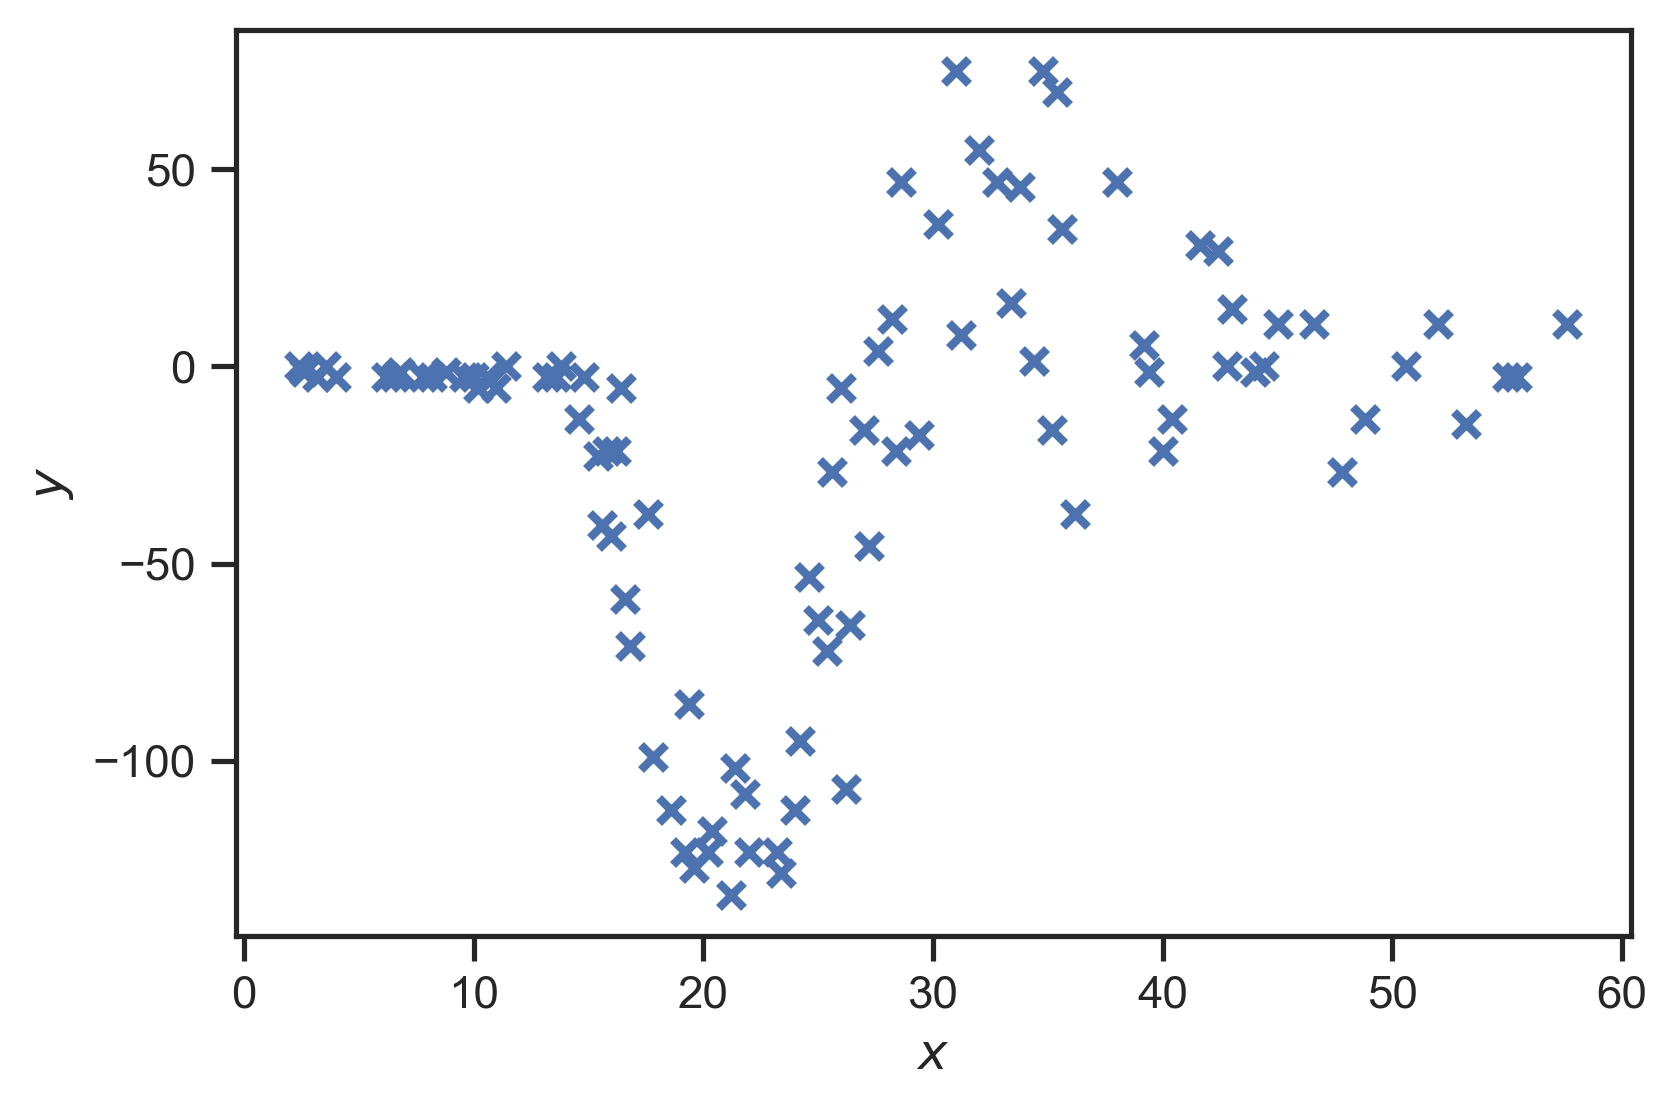

In [6]:
data = np.loadtxt('motor.dat')
X = data[:, 0][:, None]
Y = data[:, 1]
fig, ax = plt.subplots(dpi=150)
ax.plot(X, Y, 'x', markeredgewidth=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

Let's start with polynomial regression.
We just need to write code that calculates the design matrix.
Here is the code:

In [7]:
def get_polynomial_design_matrix(x, degree):
    """
    Returns the polynomial design matrix of ``degree`` evaluated at ``x``.
    """
    # Make sure this is a 2D numpy array with only one column
    assert isinstance(x, np.ndarray), 'x is not a numpy array.'
    assert x.ndim == 2, 'You must make x a 2D array.'
    assert x.shape[1] == 1, 'x must be a column.'
    # Start with an empty list where we are going to put the columns of the matrix
    cols = []
    # Loop over columns and add the polynomial
    for i in range(degree+1):
        cols.append(x ** i)
    return np.hstack(cols)

Here is how the design matrix for degree 3 polynomial looks like:

In [8]:
Phi = get_polynomial_design_matrix(X, 3)
print(Phi[:5, :])

[[ 1.     2.4    5.76  13.824]
 [ 1.     2.6    6.76  17.576]
 [ 1.     3.2   10.24  32.768]
 [ 1.     3.6   12.96  46.656]
 [ 1.     4.    16.    64.   ]]


Let's now visualize the polynomials as a function of $x$ so that you get some intuition about how $y$ is expanded:

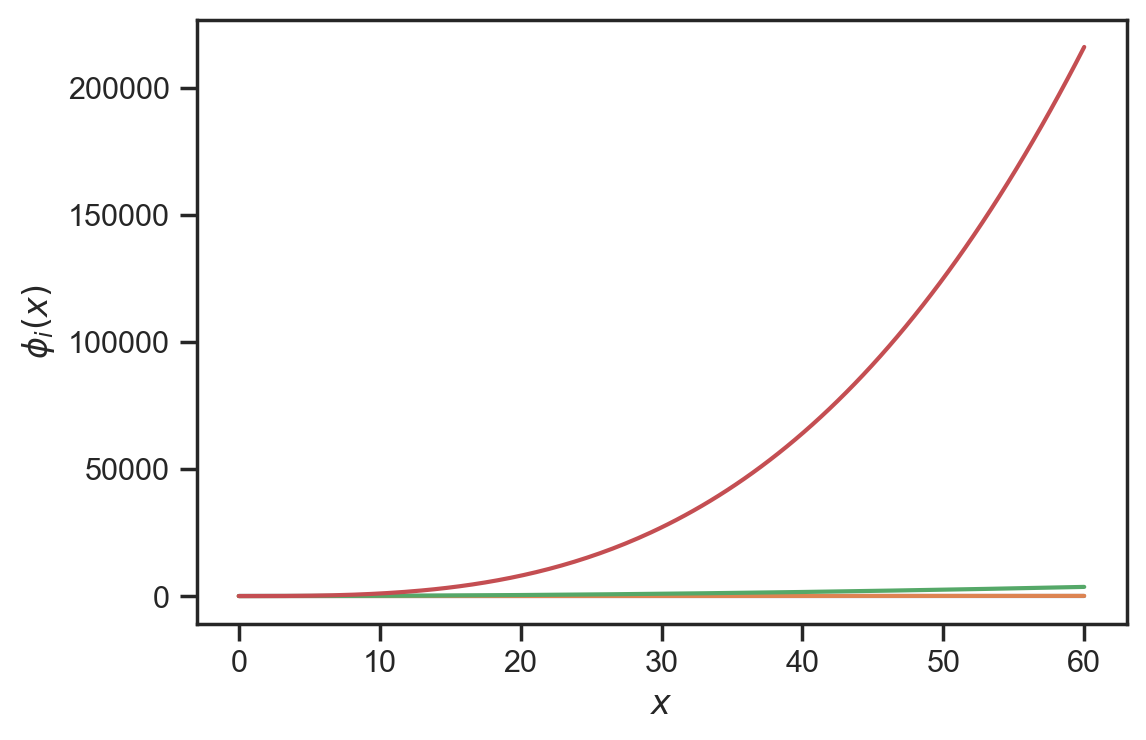

In [10]:
fig, ax = plt.subplots()
xx = np.linspace(0, 60, 200)
Phi_xx = get_polynomial_design_matrix(xx[:, None], 3)
plt.plot(xx, Phi_xx)
plt.ylabel(r'$\phi_i(x)$')
plt.xlabel('$x$');

Let's now solve the least squares problem:

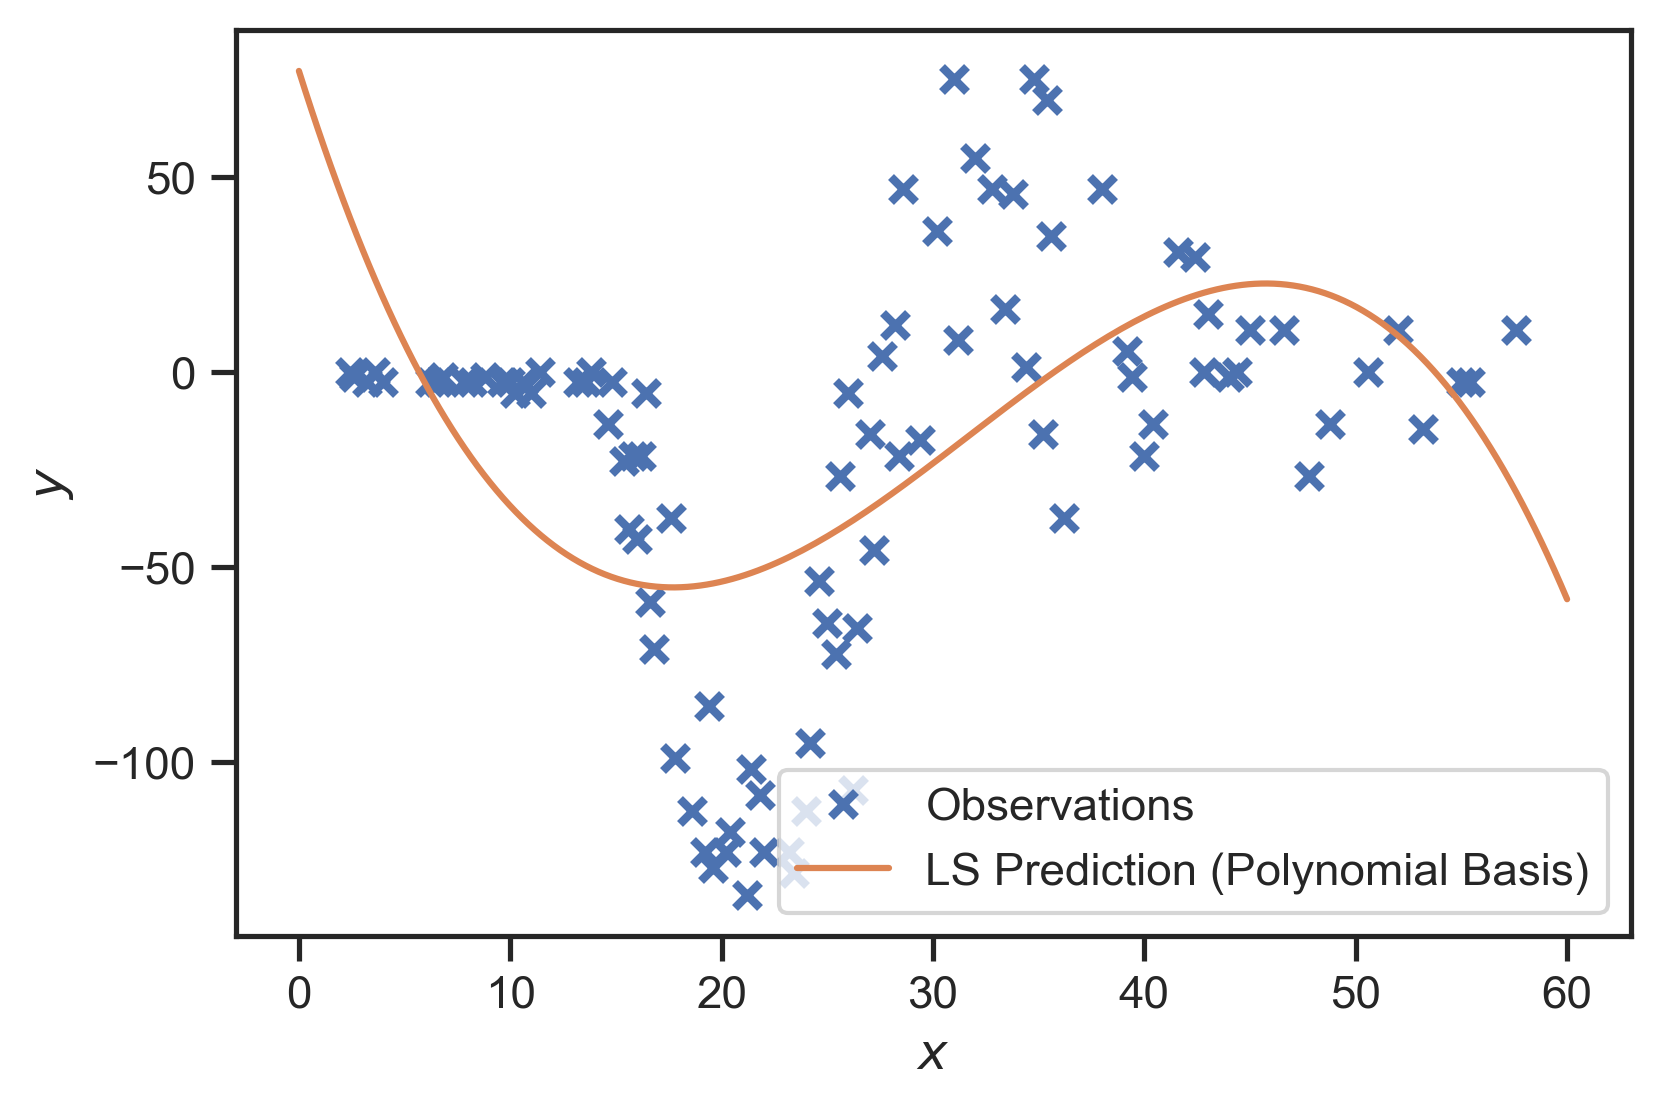

In [11]:
# Pick the polynomial degree
degree = 3
# Make the design matrix
Phi = get_polynomial_design_matrix(X, degree)
# Solve least squares problem
w_LS = np.linalg.lstsq(Phi, Y, rcond=None)[0]
# Make prediction at a dense set of points
xx = np.linspace(0, 60, 200)
Phi_xx = get_polynomial_design_matrix(xx[:, None], degree)
Y_p = np.dot(Phi_xx, w_LS)
# Plot the predictions
fig, ax = plt.subplots(dpi=150)
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(xx, Y_p, label='LS Prediction (Polynomial Basis)')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

### Questions

+ Experiment with polynomials of degree 4, 5, 10, 20
+ When are we underfitting?
+ When are we overfitting?
+ Which degree (if any) gives you the best fit?

## Example - Motorcycle data with Fourier basis

Let's now repeat what we did with polynomial regression with a Fourier basis.
The mathematical form of the basis is:
$$
\phi_{2j}(x) = \cos\left(\frac{2j\pi}{L}x)\right),
$$
and
$$
\phi_{2j+1}(x) = \sin\left(\frac{2j\pi}{L}x)\right),
$$
for $j=1,\dots,m/2$.
First, we write code that computes the design matrix for the new basis:

In [12]:
def get_fourier_design_matrix(x, L, num_terms):
    """
    Fourier expansion with ``num_terms`` cosines and sines.
    
    Arguments:
    
        L           -       The "length" of the domain.
        num_terms   -       How many Fourier terms do you want. This is not the number
                            of basis functions you get. The number of basis functions
                            is 1 + num_terms / 2. The first one is a constant.
    """
    # Make sure this is a 2D numpy array with only one column
    assert isinstance(x, np.ndarray), 'x is not a numpy array.'
    assert x.ndim == 2, 'You must make x a 2D array.'
    assert x.shape[1] == 1, 'x must be a column.'
    N = x.shape[0]
    cols = [np.ones((N, 1))]
    # Loop over columns and add the polynomial
    for i in range(int(num_terms / 2)):
        cols.append(np.cos(2 * (i+1) * np.pi / L * x))
        cols.append(np.sin(2 * (i+1) * np.pi / L * x))
    return np.hstack(cols)

Let's start by visualizing the Fourier basis:

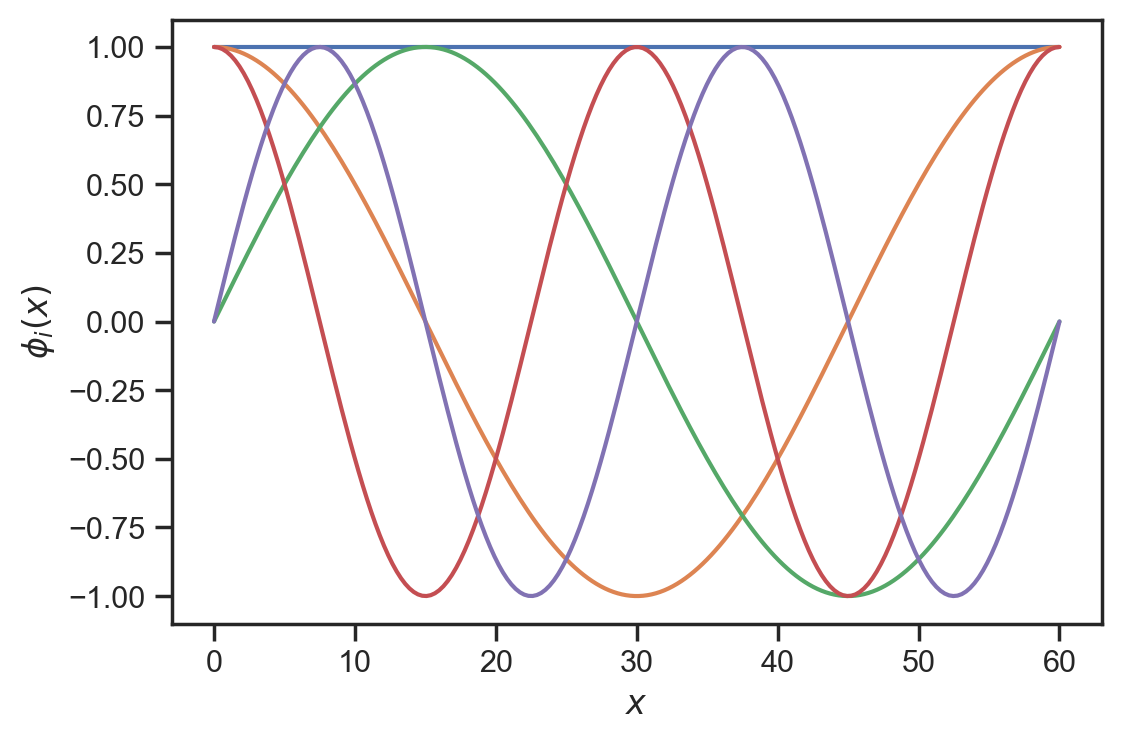

In [19]:
fig, ax = plt.subplots()
xx = np.linspace(0, 60, 200)
Phi_xx = get_fourier_design_matrix(xx[:, None], 60.0, 4)
plt.plot(xx, Phi_xx)
plt.ylabel(r'$\phi_i(x)$')
plt.xlabel('$x$');

Let's now solve the least squares problem:

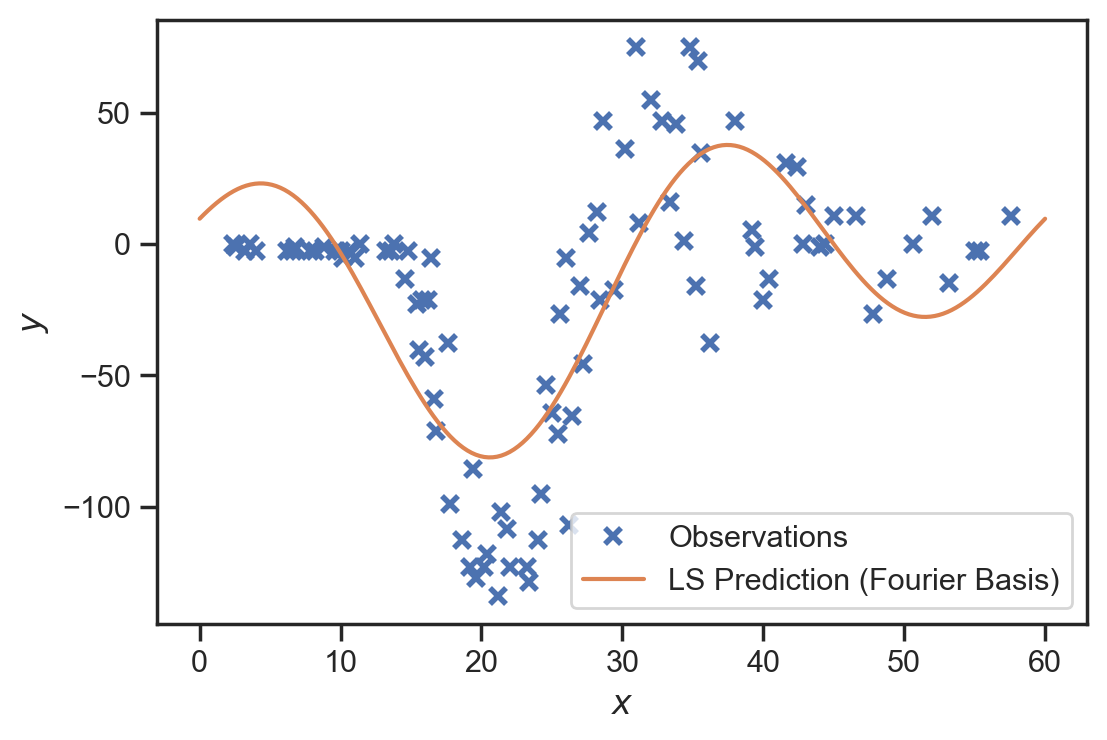

In [18]:
# Pick the parameters of the Fourier basis
L = 60.0
num_terms = 4
# Make the design matrix
Phi = get_fourier_design_matrix(X, L, num_terms)
# Solve least squares problem
w_LS = np.linalg.lstsq(Phi, Y, rcond=None)[0]
# Make prediction at a dense set of points
xx = np.linspace(0, 60, 200)
Phi_xx = get_fourier_design_matrix(xx[:, None], L, num_terms)
Y_p = np.dot(Phi_xx, w_LS)
# Plot the predictions
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(xx, Y_p, label='LS Prediction (Fourier Basis)')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

### Questions

+ Experiment with 4, 10, 20, 40, terms.
+ When are we underfitting?
+ When are we overfitting?
+ Which one (if any) gives you the best fit?

## Example - Motorcycle data with Fourier basis

Let's now try out the radial basis functions.
The mathematical form is:
$$
\phi_i(x) = \exp\left\{-\frac{(x-x_i^c)^2}{2\ell^2}\right\},
$$
where $x_i^c$ are points about each the basis functions are centered.
We start with the code that evaluates the design matrix:

In [15]:
def get_rbf_design_matrix(x, x_centers, ell):
    """
    Radial basis functions design matrix.
    
    Arguments:
        x          -     the input points on which you want to evaluate the
                         design matrix
        x_center   -     the centers of the radial basis functions
        ell        -     the lengthscale of the radial basis function
    """
    # Make sure this is a 2D numpy array with only one column
    assert isinstance(x, np.ndarray), 'x is not a numpy array.'
    assert x.ndim == 2, 'You must make x a 2D array.'
    assert x.shape[1] == 1, 'x must be a column.'
    N = x.shape[0]
    cols = [np.ones((N, 1))]
    # Loop over columns and add the polynomial
    for i in range(x_centers.shape[0]):
        cols.append(np.exp(-(x - x_centers[i]) ** 2 / ell))
    return np.hstack(cols)

Now let's visualize the basis:

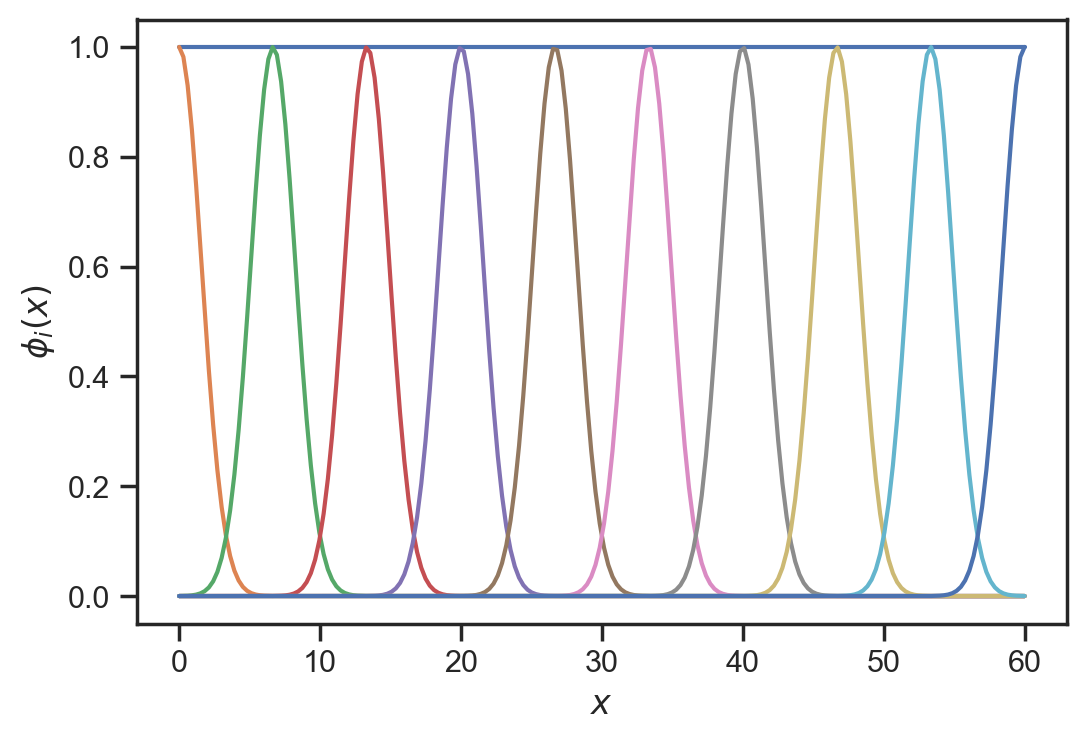

In [17]:
fig, ax = plt.subplots()
xx = np.linspace(0, 60, 200)
ell = 5.
num_terms = 10
x_centers = np.linspace(0, 60, num_terms)
Phi_xx = get_rbf_design_matrix(xx[:, None], x_centers, ell)
plt.plot(xx, Phi_xx)
plt.ylabel(r'$\phi_i(x)$')
plt.xlabel('$x$');

Now let's solve the least squares problem with this basis:

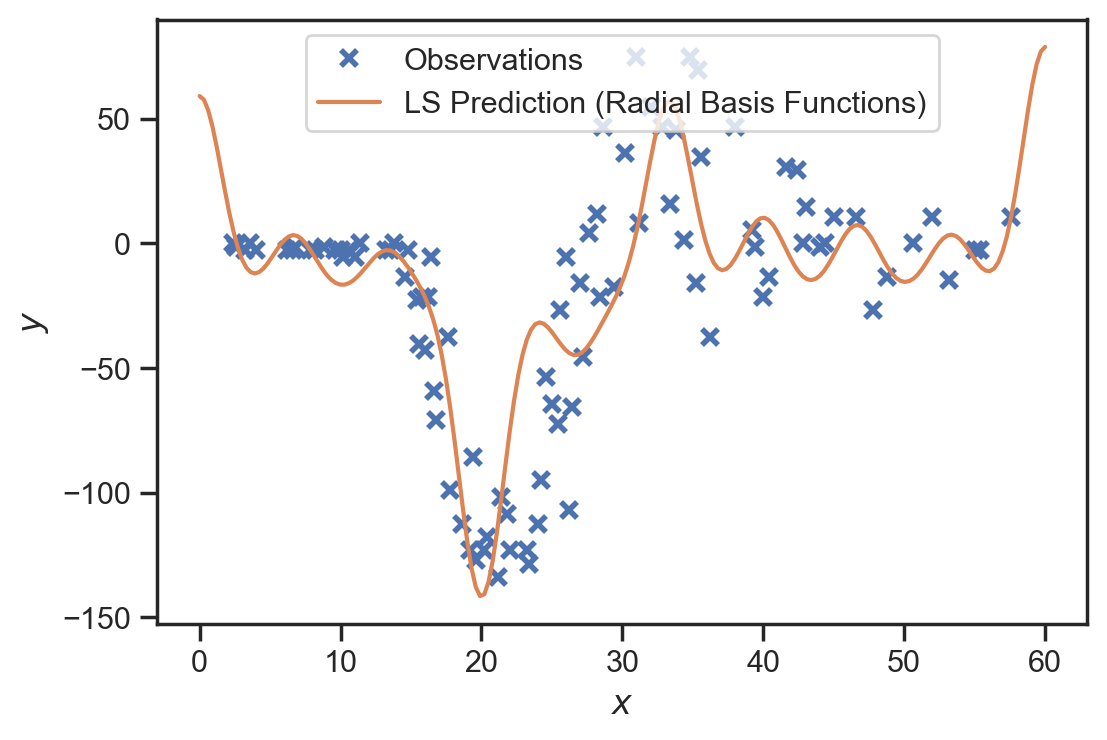

In [21]:
# Make the design matrix
Phi = get_rbf_design_matrix(X, x_centers, ell)
# Solve least squares problem
w_LS = np.linalg.lstsq(Phi, Y, rcond=None)[0]
# Make prediction at a dense set of points
xx = np.linspace(0, 60, 200)
Phi_xx = get_rbf_design_matrix(xx[:, None], x_centers, ell)
Y_p = np.dot(Phi_xx, w_LS)
# Plot the predictions
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(xx, Y_p, label='LS Prediction (Radial Basis Functions)')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

### Questions

+ Experiment with different values of ell and centers.
+ When are we underfitting?
+ Which one (if any) gives you the best fit?